In [1]:
import numpy as np
from xml.dom import minidom
import matplotlib.pyplot as plt

In [2]:
data = minidom.parse('./bayg29.xml')
#parameters
numberOfCities=29
maxTemp=25000
minTemp =2
maxSteps=1000000
coolingFactor=-np.log(maxTemp / minTemp)

costs=[]
vertices=data.getElementsByTagName('vertex')
for vertex in vertices:
    cost=[]
    for edge in vertex.getElementsByTagName('edge'):
        if len(cost)==len(costs):
            cost.append(0);
        cost.append(float(edge.getAttribute('cost')))
    costs.append(cost)
    
def getCost(path):
    totalCost=0
    for i in range(1,len(path)):
        totalCost+=costs[path[i-1]][path[i]]
    totalCost+=costs[path[-1]][path[0]]
    return totalCost
def getNeighbor2opt(path):
    newPath=list(path)
    l=np.random.randint(2,numberOfCities-1)
    i=np.random.randint(0,numberOfCities-l)
    newPath[i:(i+l)]=reversed(newPath[i:(i+l)])
    return newPath
def acceptanceProbability(currentState,newState,temp):
    delta=getCost(newState)-getCost(currentState)
    if delta<0: return 1;
    return np.exp(-delta/temp)

In [3]:
currentState=np.random.permutation(numberOfCities)
currentCost=getCost(currentState)
bestState=currentState
bestPathCost=currentCost

In [4]:
i=0
temps=[]
ccosts=[]
temp = maxTemp
while i<maxSteps:
    temp = maxTemp * np.exp(coolingFactor * i / maxSteps) # best result
    neighbor=getNeighbor2opt(currentState)
    if(np.random.rand()<acceptanceProbability(currentState,neighbor,temp)):
        currentState=neighbor
        currentCost=getCost(neighbor)    
        if(bestPathCost>currentCost):
            bestState=currentState
            bestPathCost=currentCost
    ccosts.append(currentCost)
    temps.append(temp)
    i+=1
    
    
    

In [5]:
print("Best path:\n",str(bestState).replace(",","->"),"\n Total cost:",bestPathCost)

Best path:
 [20-> 4-> 28-> 2-> 25-> 8-> 11-> 5-> 27-> 0-> 23-> 12-> 15-> 26-> 7-> 22-> 6-> 24-> 18-> 10-> 21-> 16-> 13-> 17-> 14-> 3-> 9-> 19-> 1] 
 Total cost: 1610.0


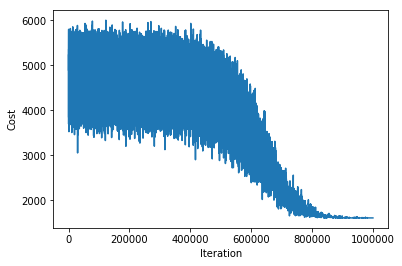

In [6]:
plt.ylabel('Cost')
plt.xlabel('Iteration')
plt.plot(ccosts)
plt.show()